In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import xarray as xr
import seaborn as sns
from scipy.stats import pearsonr

In [5]:
from antecedent_rainfall_functions import get_fc_bawap

## Read the time series data for a single pixel
The csv was produced by an IDL code: https://bitbucket.csiro.au/users/gue026/repos/idl-code-juan/browse/Fractional_Cover/get_fc_rain_time_series.pro#1 

In [2]:
fname = '/datasets/work/lw-covforecast/work/antecedent rainfall/antecedentRainfall_-22.677_141.315.all_v310.csv'
ar = pd.read_csv(fname)
ar['date'] = pd.to_datetime((ar.YEAR*100+ar.MONTH*1).apply(str),format='%Y%m')
ar.index = ar['date']
ar

,YEAR,MONTH,RAIN,PV,NPV,BS,TOT,GPV,GNPV,GBS,GTOT,date
date,,,,,,,,,,,,
1995-01-01,1995,1,66.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1995-01-01
1995-02-01,1995,2,91.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1995-02-01
1995-03-01,1995,3,9.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1995-03-01
1995-04-01,1995,4,0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1995-04-01
1995-05-01,1995,5,35.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1995-05-01
1995-06-01,1995,6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1995-06-01
1995-07-01,1995,7,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1995-07-01
1995-08-01,1995,8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1995-08-01
1995-09-01,1995,9,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1995-09-01


### create a simple plot to illustrate the data

/apps/python/3.6.1/lib/python3.6/site-packages/matplotlib-2.0.2-py3.6-linux-x86_64.egg/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


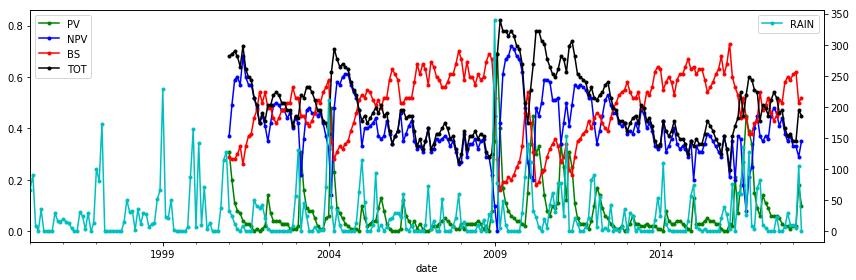

In [3]:
fig, ax = plt.subplots(figsize=(12,4), tight_layout=True)
ax2=ax.twinx()
ar.plot(y=['PV','NPV','BS', 'TOT'], color=['g','b','r','k'], marker='.', ax=ax)
ar.plot(y=['RAIN'], marker='.', color='c', ax=ax2 )
plt.show()

The `rolling` function in pandas agregates items. The example below calculates the mean rainfall in the 3 months before each timestep (noth including the current month).
For example, the RAIN_roll (accumulated mean rainfall) in April 95 is the mean of the rainfall in Jan, Feb and March.

In [4]:
roll = 3
ar['RAIN_roll'] = ar['RAIN'].shift(periods=1).rolling(roll).mean().round(2)

ar

,YEAR,MONTH,RAIN,PV,NPV,BS,TOT,GPV,GNPV,GBS,GTOT,date,RAIN_roll
date,,,,,,,,,,,,,
1995-01-01,1995,1,66.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1995-01-01,NaN
1995-02-01,1995,2,91.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1995-02-01,NaN
1995-03-01,1995,3,9.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1995-03-01,NaN
1995-04-01,1995,4,0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1995-04-01,55.60
1995-05-01,1995,5,35.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1995-05-01,33.63
1995-06-01,1995,6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1995-06-01,14.97
1995-07-01,1995,7,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1995-07-01,11.93
1995-08-01,1995,8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1995-08-01,11.90
1995-09-01,1995,9,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1995-09-01,0.20


now show a simple example: 
The correlation between the total cover in all Januaries and the mean rainfall in the 33 months before each January

/apps/python/3.6.1/lib/python3.6/site-packages/matplotlib-2.0.2-py3.6-linux-x86_64.egg/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


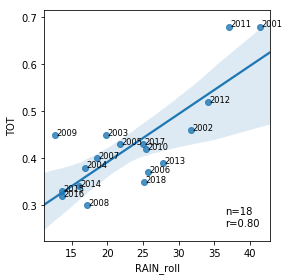

In [5]:
roll = 33
month=1
fig, ax = plt.subplots(figsize=(4,4), tight_layout=True, sharex=True, sharey=True)

ar['RAIN_roll'] = ar['RAIN'].shift(periods=1).rolling(roll).mean().round(2)
ar_plot = ar.loc[ar['MONTH'] == month].dropna(subset=['RAIN_roll','TOT'])

sns.regplot(x=ar_plot['RAIN_roll'], y=ar_plot['TOT'], ax=ax)

for line in range(0,ar_plot.shape[0]):
     ax.text(ar_plot.RAIN_roll[line]+0.2, ar_plot.TOT[line], ar_plot.YEAR[line], horizontalalignment='left', size='small', color='black')


r= pearsonr(ar_plot['RAIN_roll'], ar_plot['TOT'])[0]
text = 'n='+str(format(ar_plot['RAIN_roll'].count(),'.0f'))+'\n'+ \
       'r='+str(format(r,'.2f'))

ax.text(0.8, 0.15, text, transform=ax.transAxes, verticalalignment='top')


### Do the analysis for all months and all rolling periods (this takes a while)
each column corresponds to a month and each row corresponds ot a rolling period from 1 to 60

number of months=  1


/apps/python/3.6.1/lib/python3.6/site-packages/matplotlib-2.0.2-py3.6-linux-x86_64.egg/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


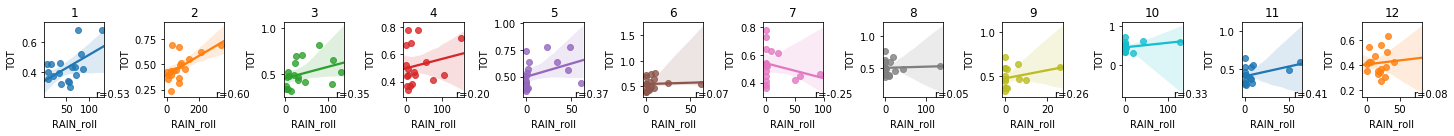

number of months=  2


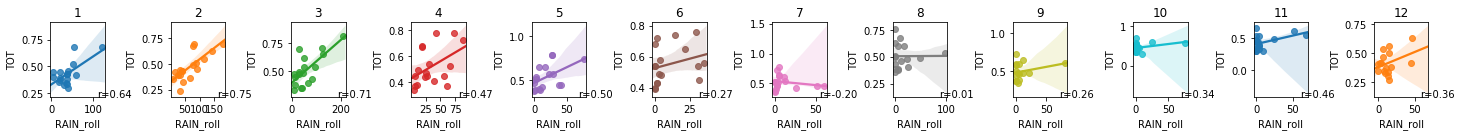

number of months=  3


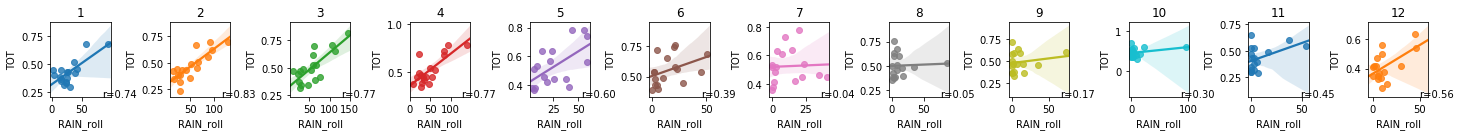

number of months=  4


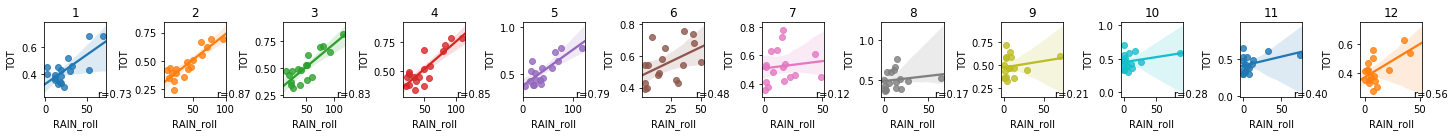

number of months=  5


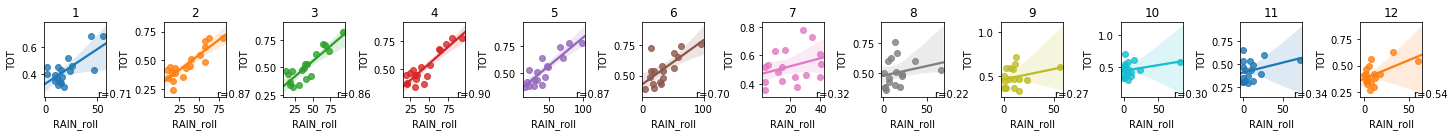

number of months=  6


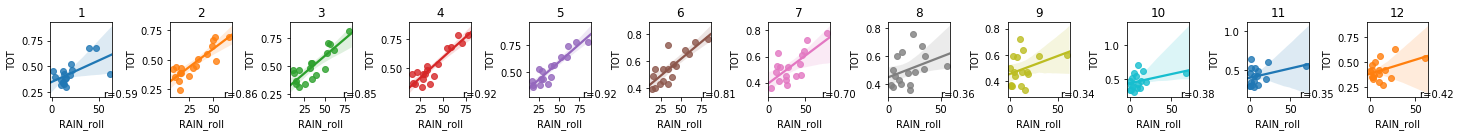

number of months=  7


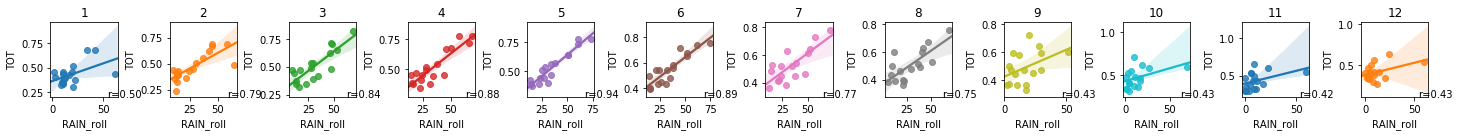

number of months=  8


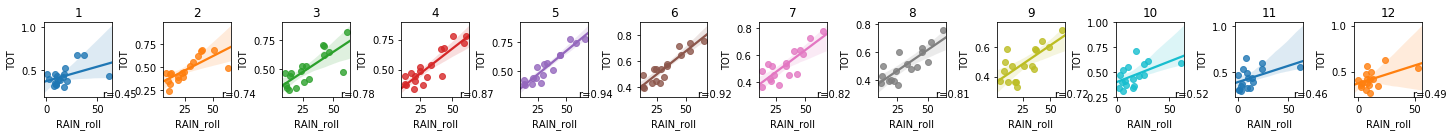

number of months=  9


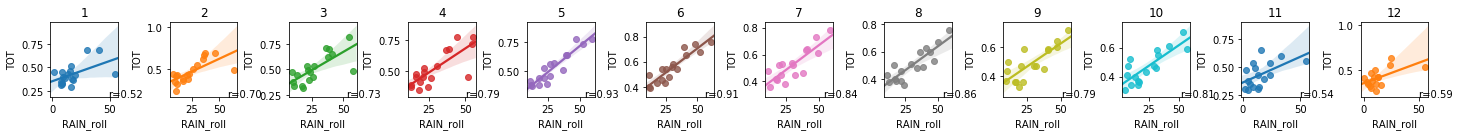

number of months=  10


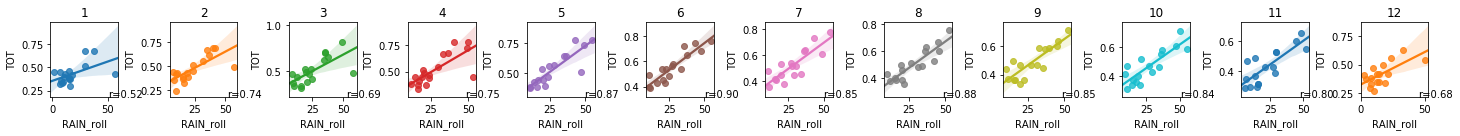

number of months=  11


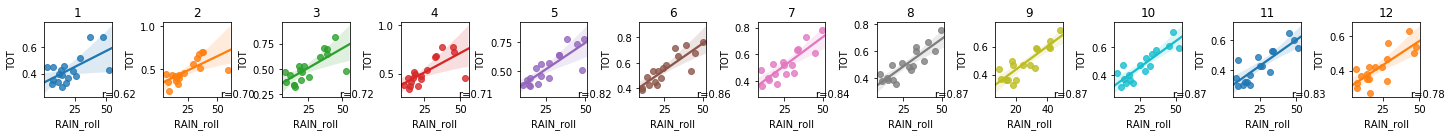

number of months=  12


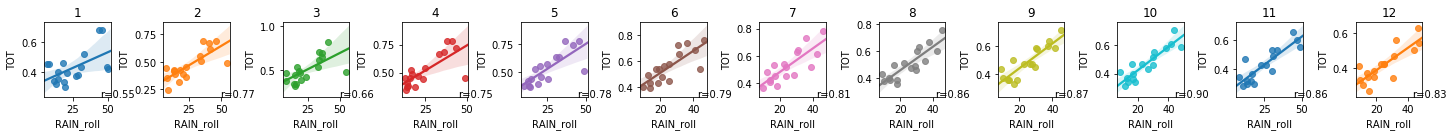

number of months=  13


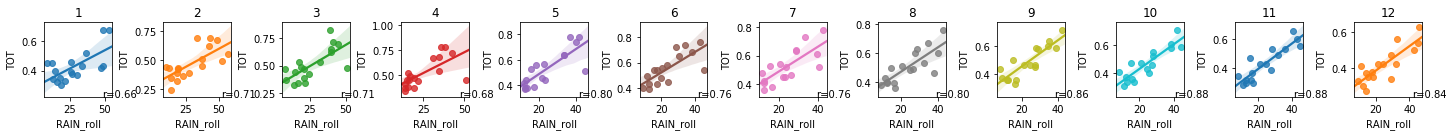

number of months=  14


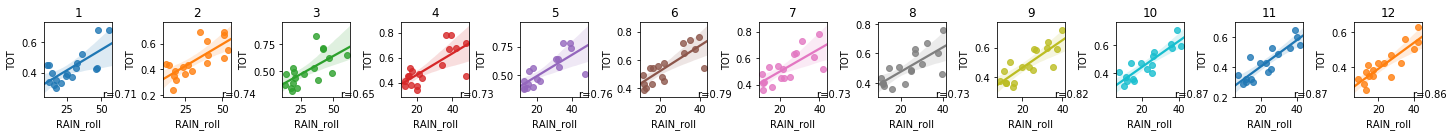

number of months=  15


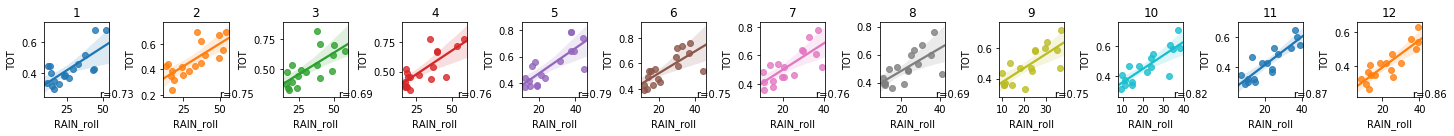

number of months=  16


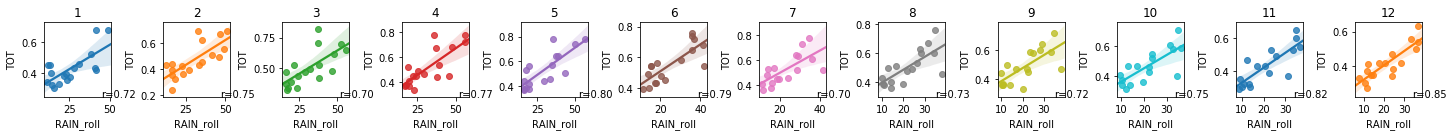

number of months=  17


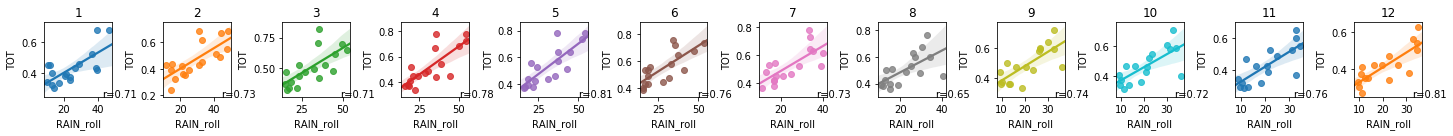

number of months=  18


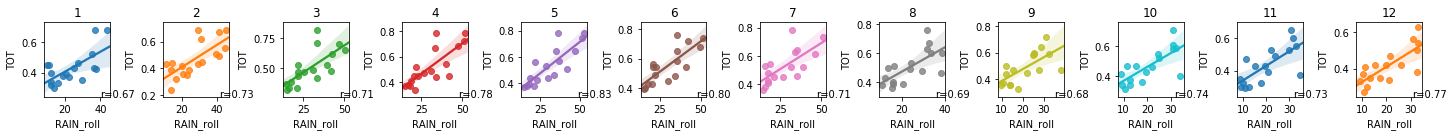

number of months=  19


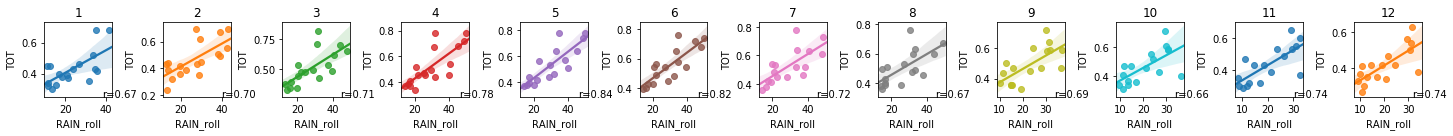

number of months=  20


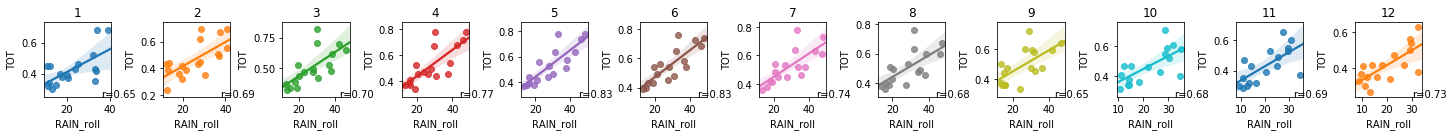

number of months=  21


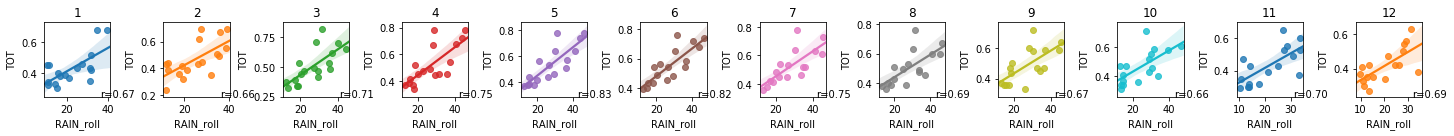

number of months=  22


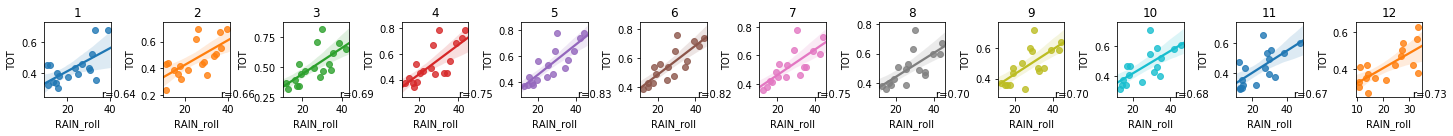

number of months=  23


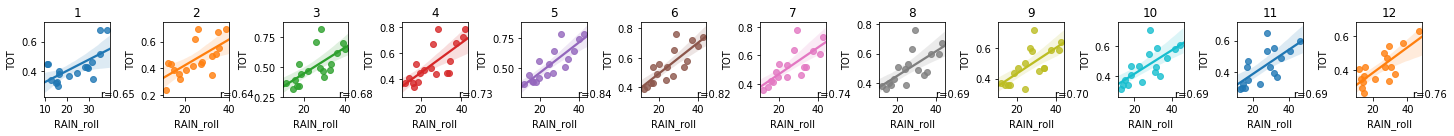

number of months=  24


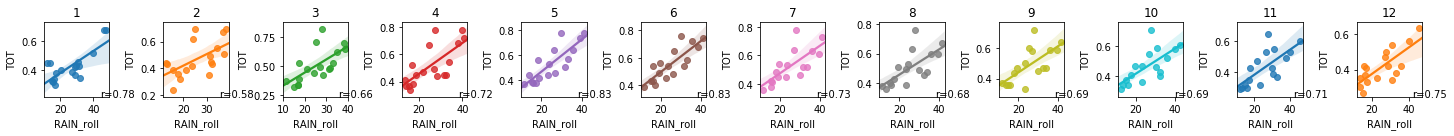

number of months=  25


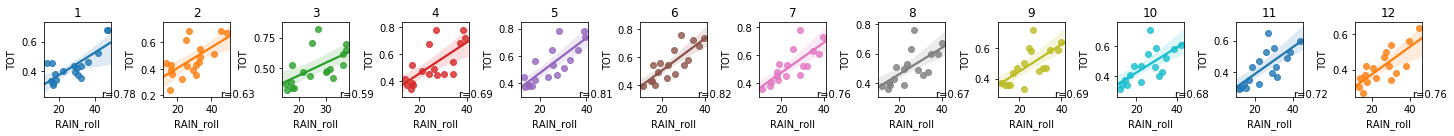

number of months=  26


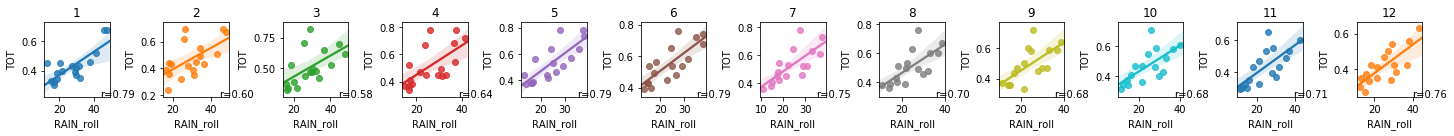

number of months=  27


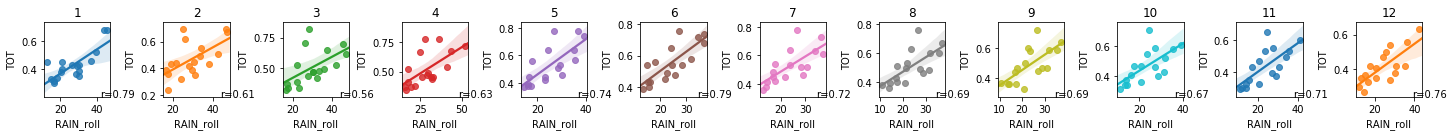

number of months=  28


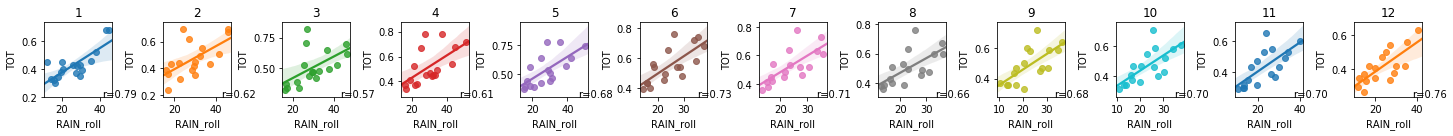

number of months=  29


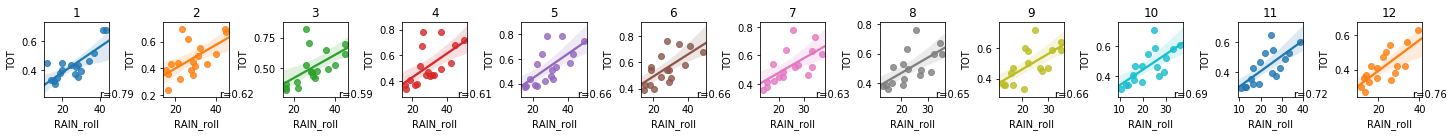

number of months=  30


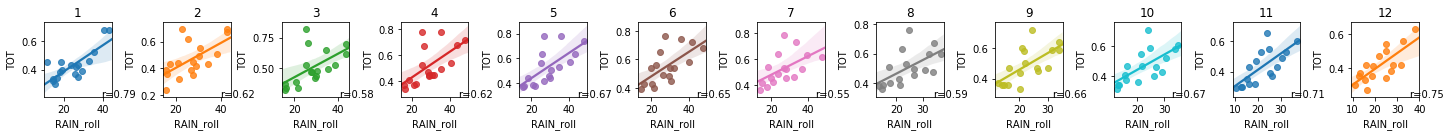

number of months=  31


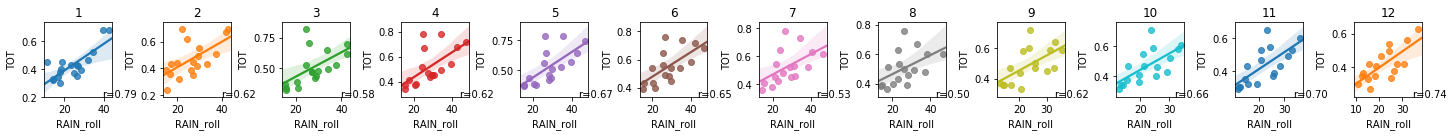

number of months=  32


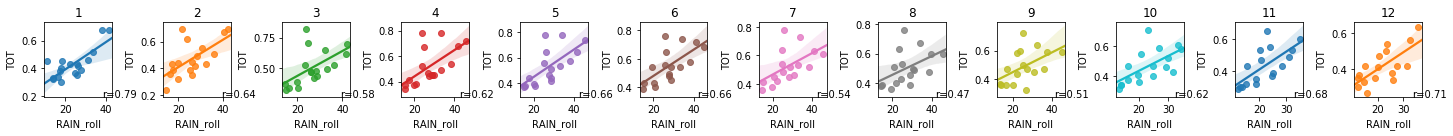

number of months=  33


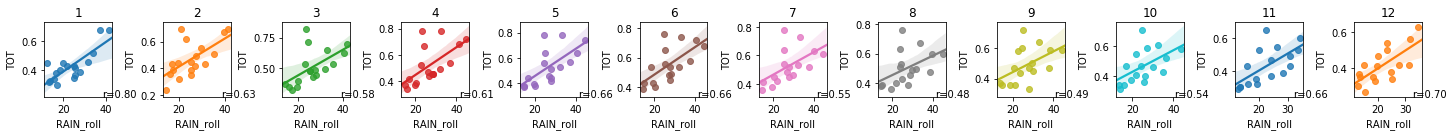

number of months=  34


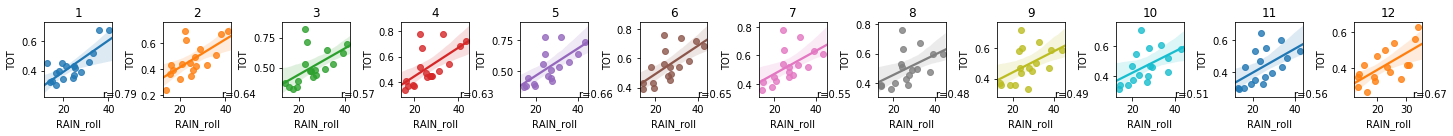

number of months=  35


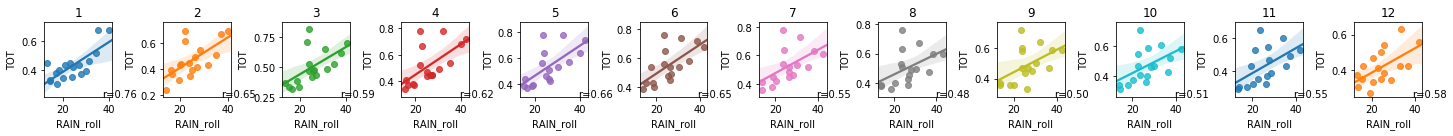

number of months=  36


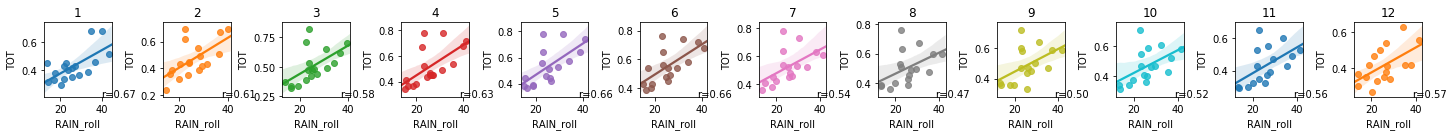

number of months=  37


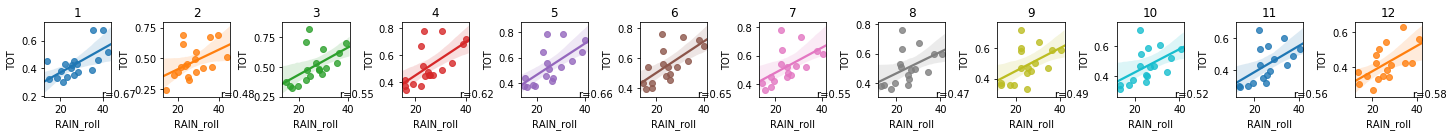

number of months=  38


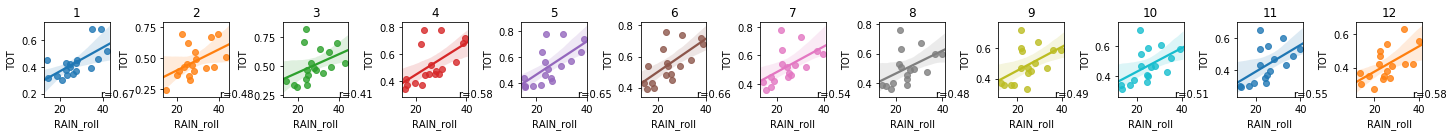

number of months=  39


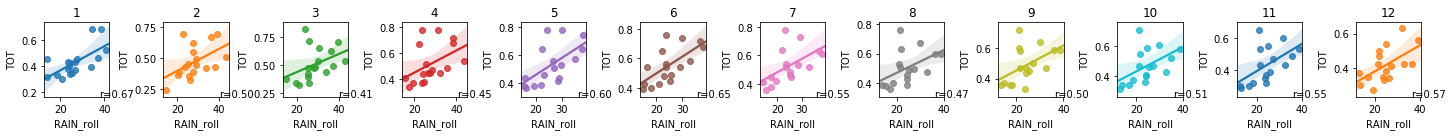

number of months=  40


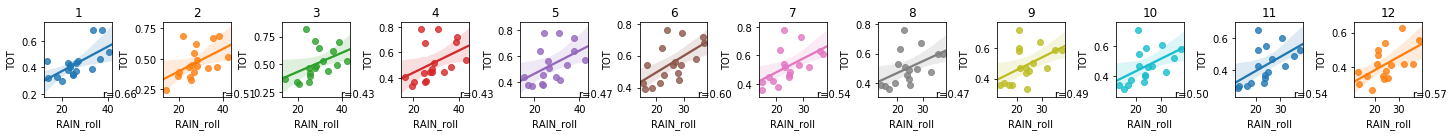

number of months=  41


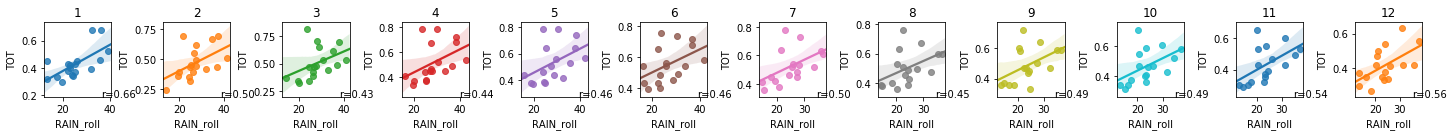

number of months=  42


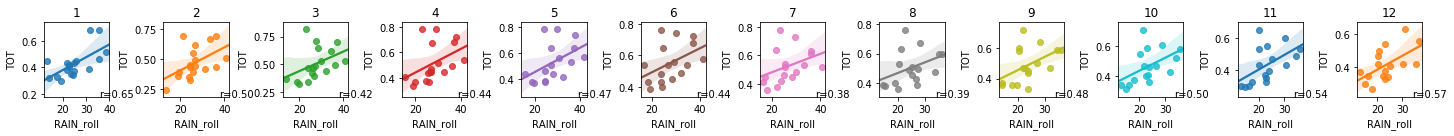

number of months=  43


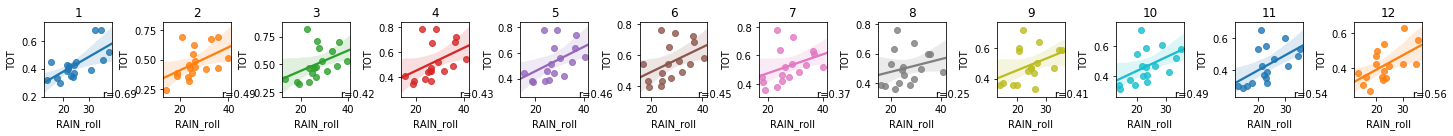

number of months=  44


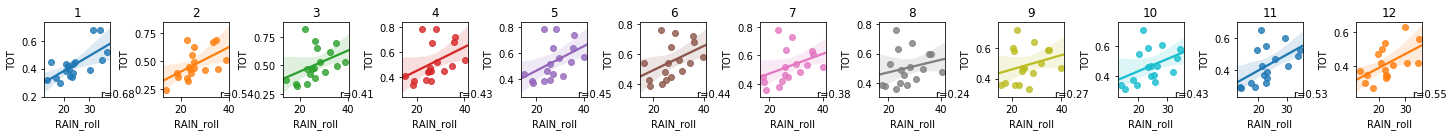

number of months=  45


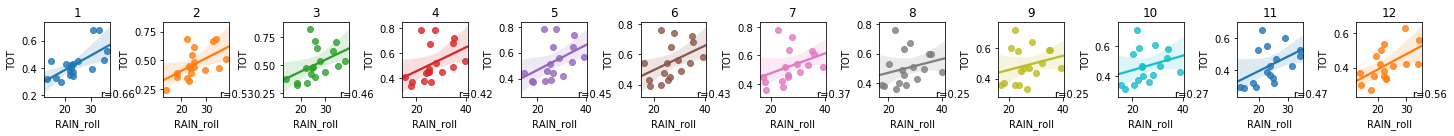

number of months=  46


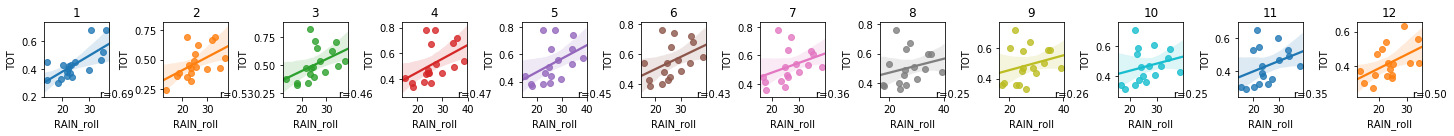

number of months=  47


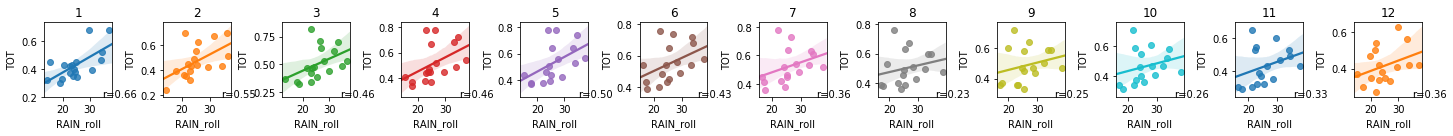

number of months=  48


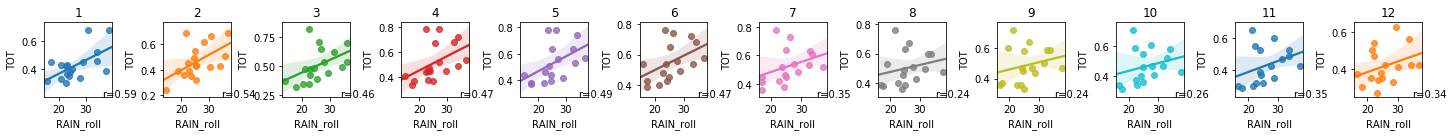

number of months=  49


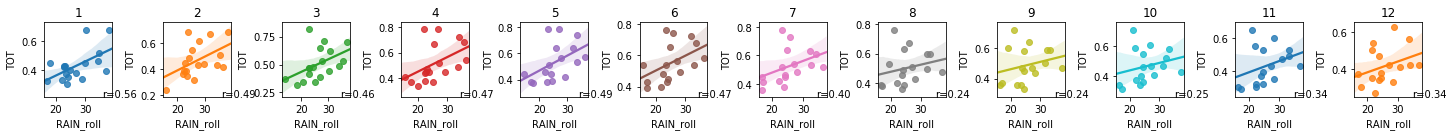

number of months=  50


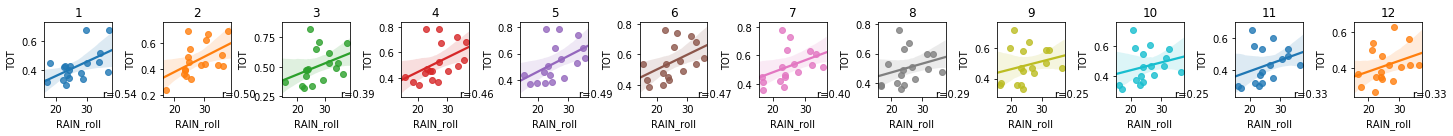

number of months=  51


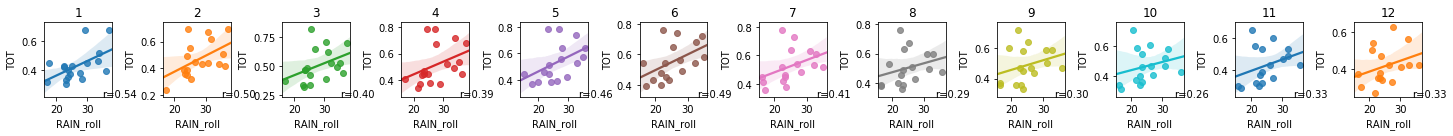

number of months=  52


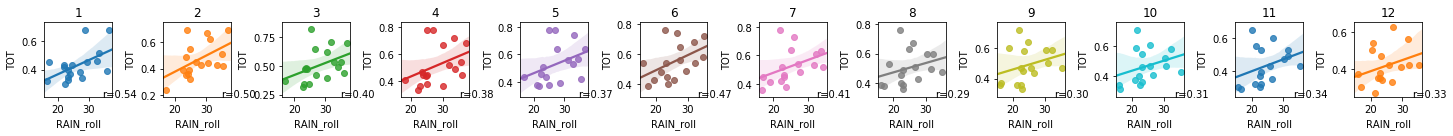

number of months=  53


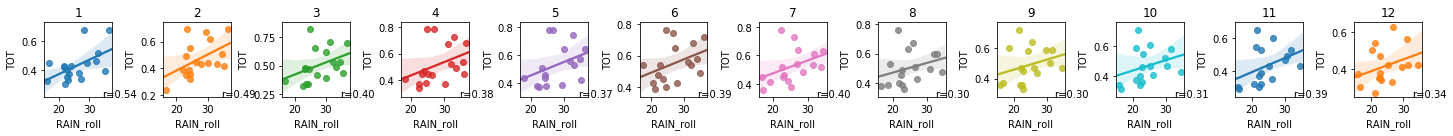

number of months=  54


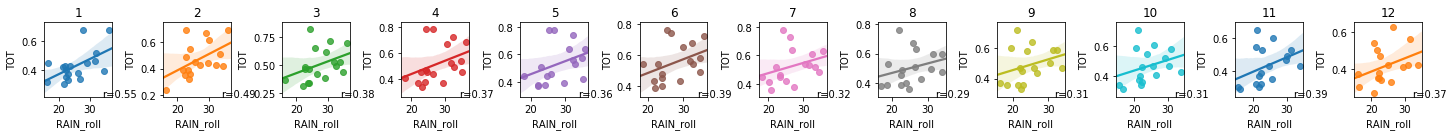

number of months=  55


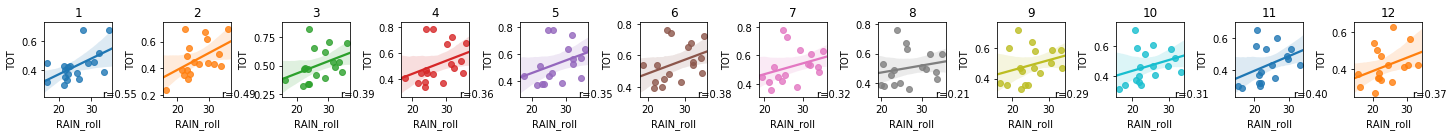

number of months=  56


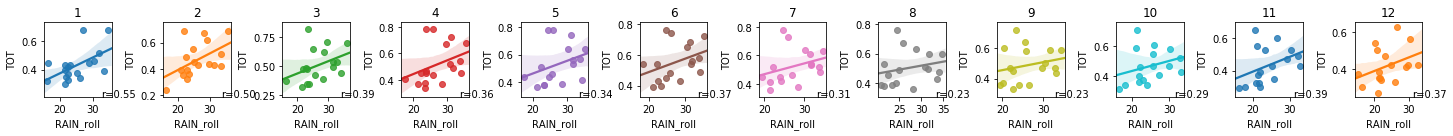

number of months=  57


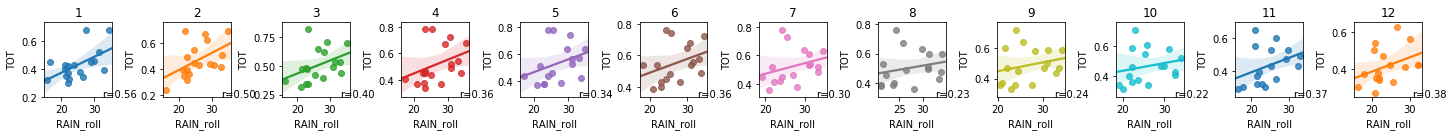

number of months=  58


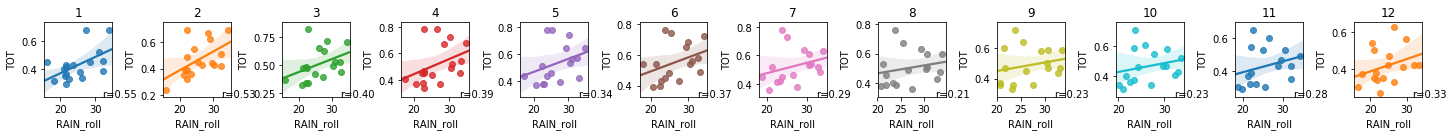

number of months=  59


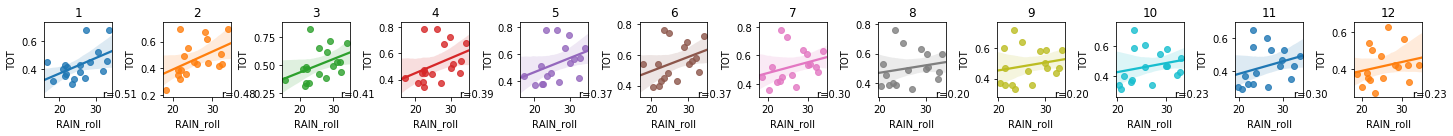

number of months=  60


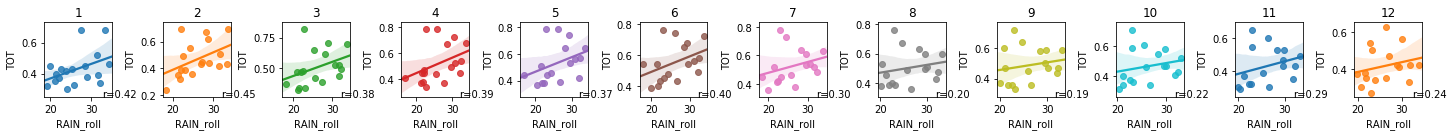

In [15]:
for roll in range(1,61):
    print('number of months= ',roll)
    fig, ax = plt.subplots(1, 12, figsize=(20,2), tight_layout=True)

    for month in range(1,13):
        #print(roll, month)
        ar['RAIN_roll'] = ar['RAIN'].shift(periods=1).rolling(roll).mean().round(2)

        ar_plot = ar.loc[ar['MONTH'] == month].dropna(subset=['RAIN_roll','TOT'])

        sns.regplot(x=ar_plot['RAIN_roll'], y=ar_plot['TOT'], ax=ax[month-1])

        r= pearsonr(ar_plot['RAIN_roll'], ar_plot['TOT'])[0]
        text = 'r='+str(format(r,'.2f'))
                #'n='+str(format(ar_plot['RAIN_roll'].count(),'.0f'))+'\n'+ \
               
        ax[month-1].text(0.85, 0.1, text, transform=ax[month-1].transAxes, verticalalignment='top')
        ax[month-1].set_title(str(month))
    plt.show()


### repeat the same, don't plot but save results

In [7]:
res = pd.DataFrame(columns=range(1,13), index=range(1,61))
for roll in range(1,61):
    for month in range(1,13):
        ar['RAIN_roll'] = ar['RAIN'].shift(periods=1).rolling(roll).mean().round(2)
        ar_plot = ar.loc[ar['MONTH'] == month].dropna(subset=['RAIN_roll','TOT'])
        r= pearsonr(ar_plot['RAIN_roll'], ar_plot['TOT'])[0]
        #print(roll, month, r)
        
        res.loc[roll, month] = r        
res

,1,2,3,4,5,6,7,8,9,10,11,12
1,0.532958,0.598449,0.348843,0.199332,0.365945,0.0667271,-0.249063,0.0537737,0.2647,0.331005,0.409432,0.078301
2,0.636157,0.753422,0.706518,0.465395,0.501221,0.270603,-0.200731,0.00715824,0.259344,0.336643,0.458985,0.360774
3,0.738636,0.825067,0.770615,0.769535,0.596535,0.393041,0.0437416,0.0491186,0.172891,0.304877,0.450034,0.564439
4,0.730625,0.872223,0.832454,0.850478,0.785685,0.481486,0.119204,0.170813,0.210665,0.281844,0.397973,0.562859
5,0.708992,0.866029,0.863325,0.899951,0.873157,0.697749,0.317804,0.223576,0.273649,0.303493,0.335598,0.536341
6,0.589386,0.85754,0.84585,0.91601,0.915079,0.812393,0.701569,0.361687,0.344956,0.3761,0.347627,0.4217
7,0.495014,0.787022,0.839164,0.881562,0.942683,0.887264,0.774487,0.748702,0.431479,0.430595,0.416043,0.428642
8,0.447323,0.73675,0.776785,0.872005,0.938557,0.916328,0.823316,0.814448,0.715079,0.523419,0.45907,0.486868
9,0.51959,0.700162,0.73072,0.79146,0.930864,0.912699,0.840319,0.863074,0.789732,0.80728,0.536657,0.588249
10,0.524278,0.735479,0.692242,0.748203,0.872508,0.904826,0.845995,0.882056,0.846041,0.839699,0.798337,0.678709


summary of the analysis. Pearson's r as a function of accumulated months and maximum r in each month 

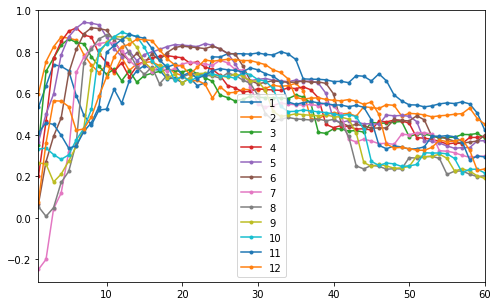

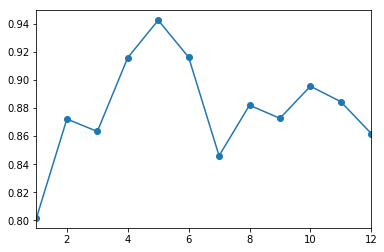

In [8]:
res.plot(figsize=[8,5], marker='.')
plt.show()

res.max().plot(marker = 'o')
plt.show()